I am solved all 6 question

1. In which category do people book the most uber ride ?

2. For which purpose do people book uber ride the most ?

3. At what time do people look cabs the most from uber ?

4. In which months do people book uber ride less frequently ?

5. On which days of the week so people book Uber rides
   the most?

6. How many miles do people usually book a cab for through uber?


In [72]:
# Importing essential libraries:
# - pandas: For data manipulation and analysis.
# - numpy: For numerical computations and working with arrays.
# - matplotlib.pyplot: For creating static, animated, and interactive visualizations.
# - seaborn: For advanced statistical data visualization based on matplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# Reading the dataset:
# Loading the Uber dataset from a CSV file into a pandas DataFrame named 'df'.
df = pd.read_csv("UberDataset.csv")


In [36]:
# Displaying the first few rows of the DataFrame:
# Using the .head() method to view the top 5 rows of the dataset.
df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [74]:
# Checking for missing values in the dataset:
# The .isnull().sum() method identifies the total number of missing values in each column.
df.isnull().sum()


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [75]:
# Calculating the proportion of missing values in each column:
# The .isnull().mean() method calculates the percentage of missing values by dividing the count of missing values by the total rows.
df.isnull().mean()


START_DATE    0.000000
END_DATE      0.000865
CATEGORY      0.000865
START         0.000865
STOP          0.000865
MILES         0.000000
PURPOSE       0.435121
dtype: float64

In [76]:
# Getting the dimensions of the DataFrame:
# The .shape attribute returns a tuple representing the number of rows and columns in the dataset (rows, columns).
df.shape


(1156, 7)

In [77]:
# Generating summary statistics of the dataset:
# The .describe() method provides statistics for numerical columns, including count, mean, std, min, 25th percentile, median (50%), 75th percentile, and max.
df.describe()


,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [78]:
# Displaying a concise summary of the DataFrame:
# The .info() method shows the number of non-null entries, data types of each column, and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


data pre-percoing


In [79]:
# Filling missing values in the 'PURPOSE' column:
# The .fillna() method replaces any missing values (NaN) in the 'PURPOSE' column with the string 'NOT'.
# The 'inplace=True' argument ensures the changes are made directly to the original DataFrame.
df['PURPOSE'].fillna('NOT', inplace=True)


C:\Users\rajna\AppData\Local\Temp\ipykernel_9552\2233218497.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('NOT', inplace=True)


In [80]:
# Converting the 'START_DATE' column to datetime format:
# The pd.to_datetime() function converts the 'START_DATE' column to a datetime object.
# The 'errors='coerce'' argument ensures that any invalid date values are converted to NaT (Not a Time) instead of raising an error.
df["START_DATE"] = pd.to_datetime(df["START_DATE"], errors='coerce')


In [81]:
# Converting the 'END_DATE' column to datetime format:
# The pd.to_datetime() function is used to convert the 'END_DATE' column to a datetime object.
# The 'errors='coerce'' argument ensures that any invalid date values are converted to NaT (Not a Time) instead of raising an error.
df["END_DATE"] = pd.to_datetime(df["END_DATE"], errors='coerce')


In [83]:
# Importing the 'datetime' class from the 'datetime' module:
# The datetime module provides classes for manipulating dates and times.
from datetime import datetime


In [84]:
# Extracting the date part from the 'START_DATE' column:
# The pd.to_datetime() function converts the 'START_DATE' column to datetime format.
# The .dt.date accessor extracts only the date (year, month, day) part, removing the time component.
df["date_start"] = pd.to_datetime(df["START_DATE"]).dt.date


In [85]:
# Extracting the hour part from the 'START_DATE' column:
# The pd.to_datetime() function converts the 'START_DATE' column to datetime format.
# The .dt.hour accessor extracts the hour part (from 0 to 23) of the time in the 'START_DATE' column.
df["time_start"] = pd.to_datetime(df["START_DATE"]).dt.hour


In [86]:
# Creating a 'daynight' column based on the 'time_start' column:
# The pd.cut() function is used to categorize the 'time_start' values into different time periods (Morning, Afternoon, Evening, Night).
# The bins argument defines the intervals for each period (e.g., 0-10 for Morning, 10-15 for Afternoon, etc.).
# The right=False argument ensures the intervals are left-inclusive and right-exclusive.
df["daynight"] = pd.cut(
    x=df['time_start'],
    bins=[0, 10, 15, 19, 24],
    labels=['Morning', 'Afternoon', 'Evening', 'Night'],
    right=False
)



In [50]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date_start,time_start,daynight
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [87]:
df.dropna(inplace=True)

In [88]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
date_start    0
time_start    0
daynight      0
dtype: int64

Data Visulalization


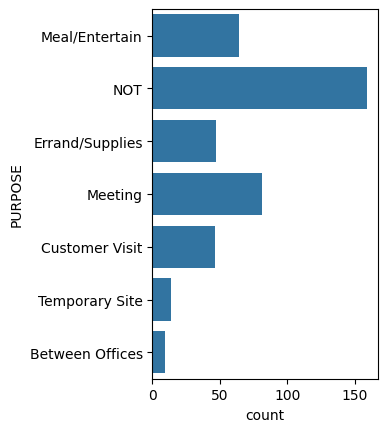

In [53]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=df)
plt.title('Count of Categories')
plt.savefig('countplot.png')  # Save the plot as a PNG file
plt.close()
plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])
plt.show()

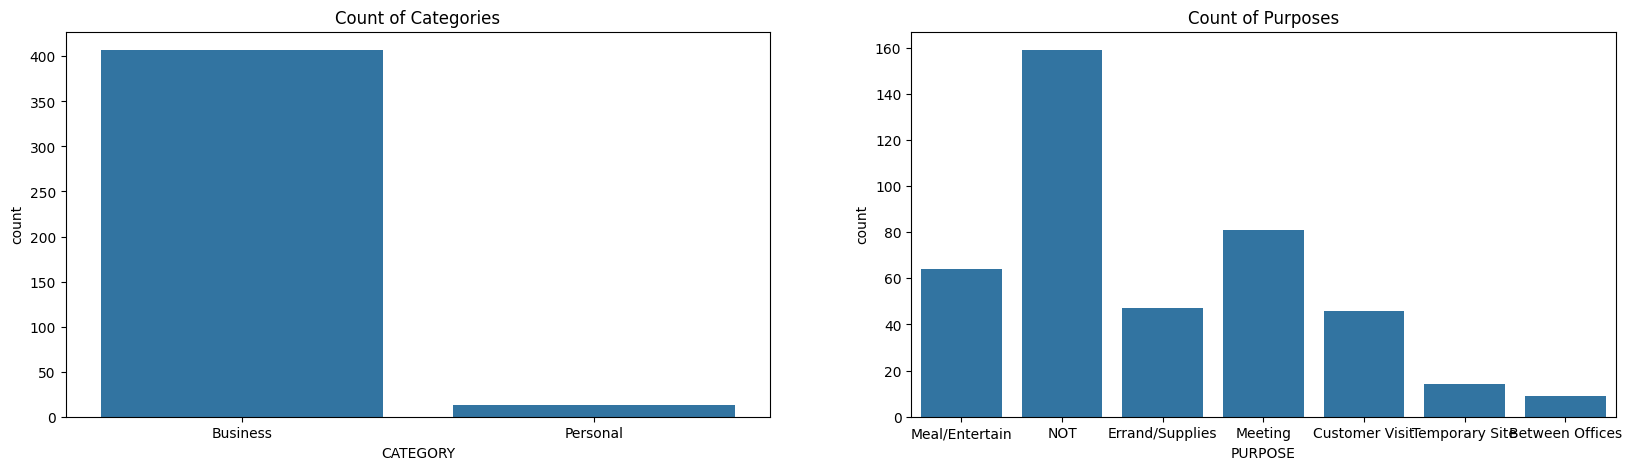

In [54]:
plt.figure(figsize=(20, 5))

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=df)
plt.title('Count of Categories')

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=df)
plt.title('Count of Purposes')

# Save the entire figure
plt.savefig('countplot.png')  # Save the plot as a PNG file
plt.show()  # Display the figure


<Axes: xlabel='count', ylabel='daynight'>

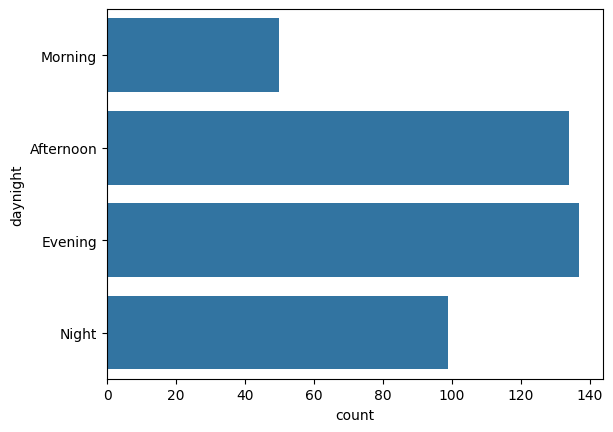

In [55]:
sns.countplot(df['daynight'])

In [56]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date_start,time_start,daynight
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [57]:
# Extract month from START_DATE
df['Month'] = pd.to_datetime(df['START_DATE']).dt.month

# Mapping numeric months to labels
month_label = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Map numeric months to month names
df['Month'] = df['Month'].map(month_label)

# Count occurrences of each month
mon = df['Month'].value_counts(sort=False)
 
print(mon)

Month
Jan    23
Feb    40
Mar    42
Apr    25
May    26
Jun    42
Jul    40
Aug    43
Sep    13
Oct    24
Nov    63
Dec    39
Name: count, dtype: int64


In [58]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date_start,time_start,daynight,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Values_count')]

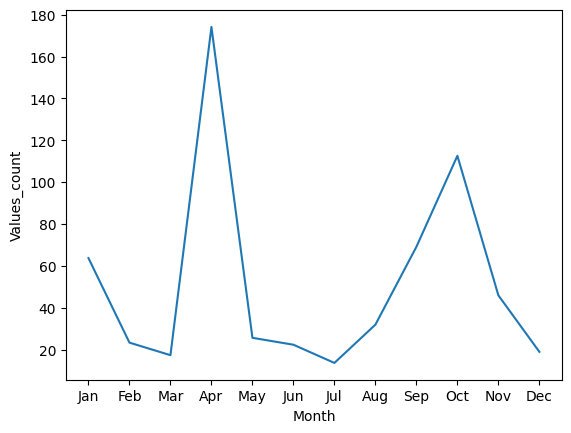

In [59]:
# Compute value counts and max miles for each month
value_counts = df['Month'].value_counts(sort=False)
max_miles = df.groupby("Month", sort=False)["MILES"].max()

# Create a DataFrame for plotting
df1 = pd.DataFrame({
    "Month": value_counts.index,
    "Values_count": max_miles.values
}).sort_index()

# Plot the data
p = sns.lineplot(data=df1, x="Month", y="Values_count")
p.set(xlabel="Month", ylabel="Values_count")


In [60]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date_start,time_start,daynight,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [61]:
df['DAY'] = df.START_DATE.dt.weekday
data_label = {
    0: 'mon',
    1: 'tue',
    2: 'wed',
    3: 'thu',
    4: 'fri',
    5: 'sat',
    6: 'sun'
}
df["DAY"] = df["DAY"].map(data_label)

In [62]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date_start,time_start,daynight,Month,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,wed


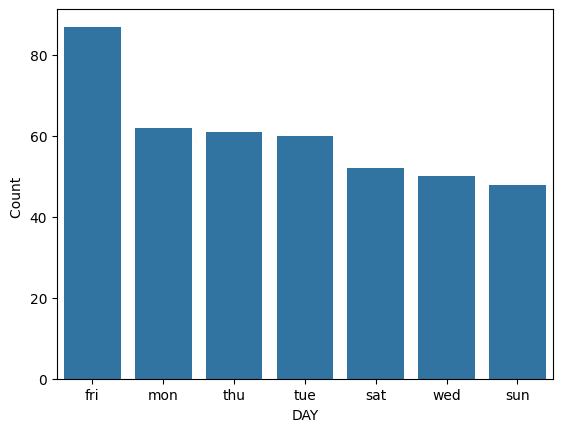

In [64]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index,y = day_label)
plt.xlabel("DAY")
plt.ylabel("Count ")
plt.show()

<Axes: ylabel='MILES'>

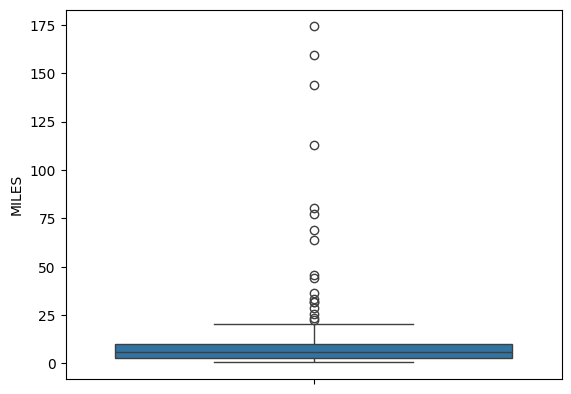

In [66]:
sns.boxplot(df["MILES"])

<Axes: ylabel='MILES'>

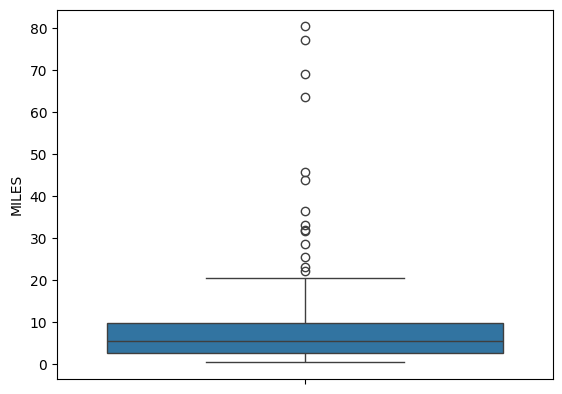

In [67]:
sns.boxplot(df[df['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

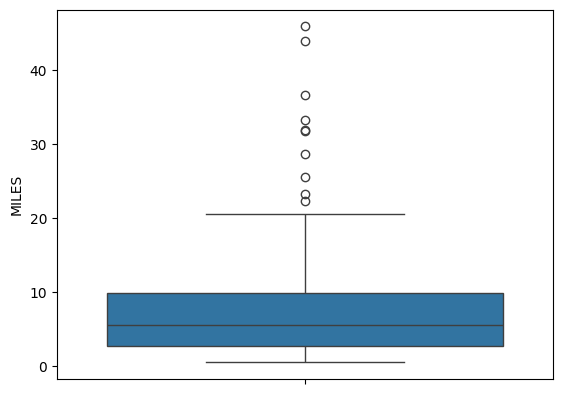

In [68]:
sns.boxplot(df[df['MILES']<50]['MILES'])

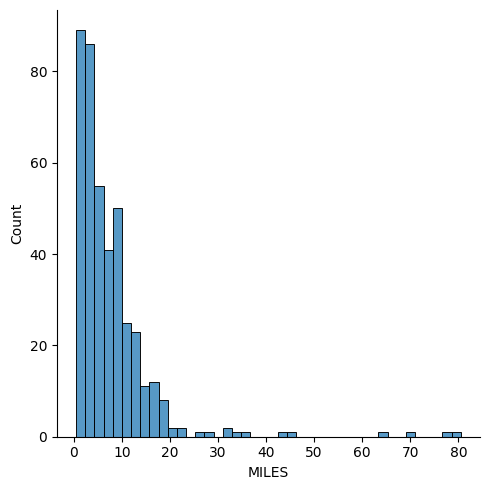

In [70]:
sns.displot(df[df['MILES']<100]['MILES'])

Using pandas Profiling


In [93]:
import pandas as pd

In [94]:
df = pd.read_csv("c.csv")

In [95]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,daynight
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Night
1,02-01-2016 01:25,02-01-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,Morning
2,02-01-2016 20:25,02-01-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Night
3,05-01-2016 17:31,05-01-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Evening
4,06-01-2016 14:42,06-01-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Afternoon
...,...,...,...,...,...,...,...,...
415,12-12-2016 13:22,12-12-2016 13:32,Business,Cary,Cary,3.1,Errand/Supplies,Afternoon
416,12-12-2016 13:36,12-12-2016 13:51,Business,Cary,Apex,4.4,Meal/Entertain,Afternoon
417,12-12-2016 14:26,12-12-2016 14:39,Business,Apex,Cary,4.7,Customer Visit,Afternoon
418,12-12-2016 17:51,12-12-2016 18:01,Business,Cary,Morrisville,3.0,Meal/Entertain,Evening


In [96]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,daynight
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Night
1,02-01-2016 01:25,02-01-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,Morning
2,02-01-2016 20:25,02-01-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Night
3,05-01-2016 17:31,05-01-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Evening
4,06-01-2016 14:42,06-01-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Afternoon


In [97]:
from ydata_profiling import ProfileReport
import pandas as pd


# Load your dataset
df = pd.read_csv('c.csv')

# Generate the profile report
profile = ProfileReport(df, title="Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("uber_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]